> 👋   Hey there! Welcome to the first notebook of our Deep learning fundamentals training! It's intended to make you discover this programming environment within Google Colab. The objectives are to discover:
1. Notebooks (different cells, hide, Markdown, ...)
2. 🐍 Python! For some of you, we can take additional time to also do some basic Python.
3. Keras: our library to deal with neural networks, by coding our first regression model, other architectures and guessing the number of parameters
4. Pytorch: another neural network library!
5. GPUs VS CPUs

When you'll see this symbol: "💡", it means that you have something to do!


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://colab.research.google.com/drive/11QuykBNGZYO6vSHpYffioxNtiFqHYLYd"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [ ]:
!python --version

#Getting familiar

# 1. Notebooks

💡 Update this cell in order to write some text in italics.


In [ ]:
# 💡 Update this cell in order to write some code. For example, a function that returns a print of its input, and run it in another cell.

# 2. Python

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
my_list = np.arange(12)

In [ ]:
# 💡 Then update this cell in order to multiply all elements of my_list by 5 and print it.

In [ ]:
my_data = [(175, 70),
          (168, 59),
          (170, 79),
          (149, 49),
          (185, 69),
          (189, 90)]

In [ ]:
df = pd.DataFrame(my_data, columns=["height", "weight"])
df

In [ ]:
df.describe()

In [ ]:
df.height.hist(bins=10);

In [ ]:
my_data = [(175, 70, 0),
          (168, 59, 1),
          (170, 79, 0),
          (149, 49, 1),
          (185, 69, 0),
          (189, 90, 0)]
df = pd.DataFrame(my_data, columns=["height", "weight", "is_woman"])

In [ ]:
df.groupby("is_woman").height.mean()

In [ ]:
df.plot(x="height", y="weight", kind="scatter");

Pandas is awsome!

# 3. Keras Tensorflow

## Let's train your first neural network!

Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. Its primary author and maintainer is François Chollet, a French Google engineer.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Create some data: a polynom of degree 2: non-linear function!
X = np.linspace(start=-1,stop=1, num=300)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X*X + X + 2 + np.random.normal(0, 0.05, (300, ))

In [ ]:
X.shape

In [ ]:
# Display the data we'll try to model:
plt.scatter(X, Y)
plt.show()

This is not a linear model! Let's try a deep learning model!

First, remember: we have to split the dataset into train/validation/test.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)  # random_state set for reproducibility
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)  # random_state set for reproducibility

In [ ]:
plt.scatter(X_test, y_test)
plt.show()

Let's define a model...



> You can find Keras documentation here! https://keras.io/api/layers/core_layers/



In [ ]:
# The Sequential model is a linear stack of layers and is very common.
model = Sequential()
# The first hidden layer is a set of 1 node (artificial neuron).
# Each node will receive an element from each input vector and apply some weight and bias to it:
# y = a(wx+b) where a = linear activatssion, ie identity.
model.add(Dense(units=20, input_shape=(1,), activation= "relu"))
model.add(Dense(units=1, activation= "linear"))

# See comments in section "Solutions and comments" in order to understand why we
# added 1 layer with several neurons.

💡 Can you guess the number of parameters for this very simple model? Try it and then find the answer at the next cell!

In [ ]:
model.summary()

In [ ]:
# Let's vizualize the model with all the dimensions!
tf.keras.utils.plot_model(model, show_shapes=True, dpi=90)

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a computation graph in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiling a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is the mean-square error.

The optimizer helps determine how quickly the model learns through gradient descent. The rate at which descends a gradient is called the learning rate.

In [ ]:
optimizer = Adam(learning_rate=1e-4)  # 💡 You can change the optimizer to see the impact on the training speed!
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer)  # https://keras.io/api/losses/

In [ ]:
# Parameters of the network for training
n_epochs = 30
batch_size = 1

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=n_epochs)

In [ ]:
# Let's vizualize the loss!
plt.title("Learning curves")
plt.plot(range(n_epochs), history.history["loss"], marker='.', label='Loss training set')
plt.plot(range(n_epochs), history.history["val_loss"], marker='.', label='Loss validation set')

plt.legend()
plt.show();

In [ ]:
model.layers[1].get_weights()

In [ ]:
# Let's vizualize the predictions!
ground_truth = plt.scatter(X_test, y_test)
prediction = plt.scatter(X_test, model.predict(X_test))
plt.legend((ground_truth, prediction),
           ('Ground truth', 'Prediction'))
plt.show()

Not a very good result with such a simple network...

💡 Now, it's your turn... Play with the network architecture and the hyper-parameters in order to fit the dataset! Remember, you can play with:
- the number of layers
- the number of neurons
- the activation functions
- the number of epochs
- the optimizer
- the learning rate: try to increase and decrease it
- ...

Each time, try to guess the number of trainable parameters of the model, and vizualize the results and compare it to the previous ones.

## Solutions and comments

### **Exercice 1: approximate a polynom of degree 2**




**Objective 1: get an intuition on the number of layers VS neurons**
- several layers = composition of functions :

```
f(X) = ReLu(ReLu(ReLu(X)))  =   ReLu(X)!
```

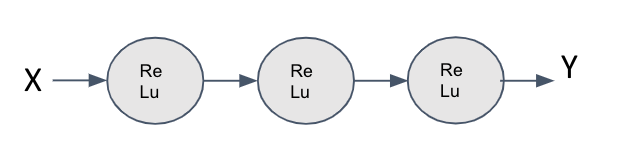

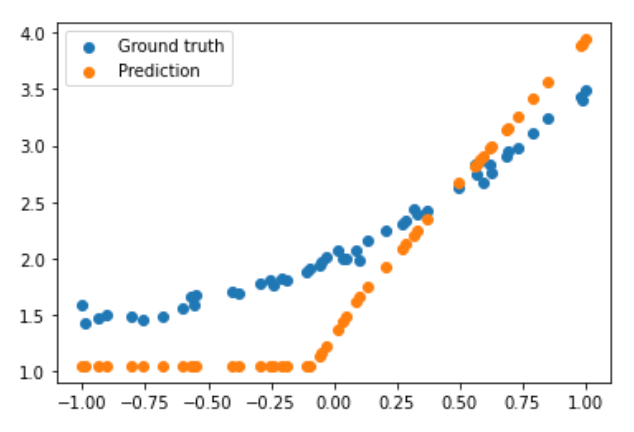


- several neurons = sum of functions :

```
f(X) = ReLu(X) + ReLu(X) + ReLu(X) = fonction linéaire par morceaux
```

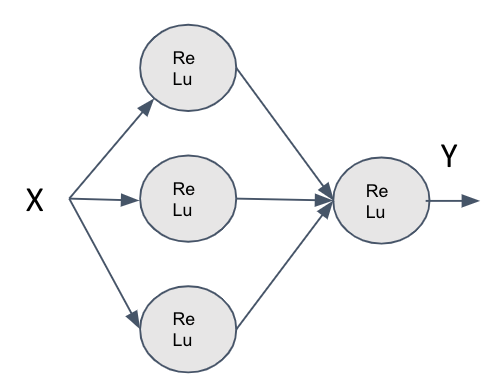

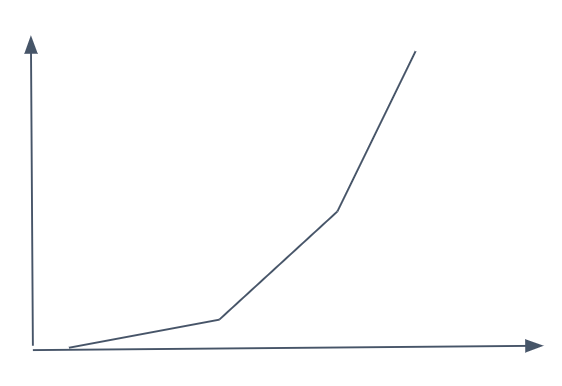


**Objective 2: get an intuition of the risks of using some activations**

The risk of using a ReLu activation is to get dead neurons, and the network won't learn anything...
It can be better to use a linear activation for the last layer, just to ensure that you won't get 1 dead neuron!

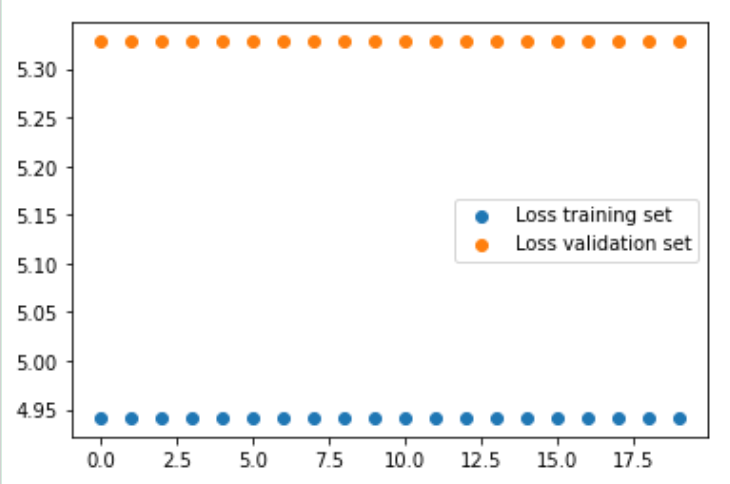

**Objective 3: see the impact on the learning rate**

High learning rate (1e-2)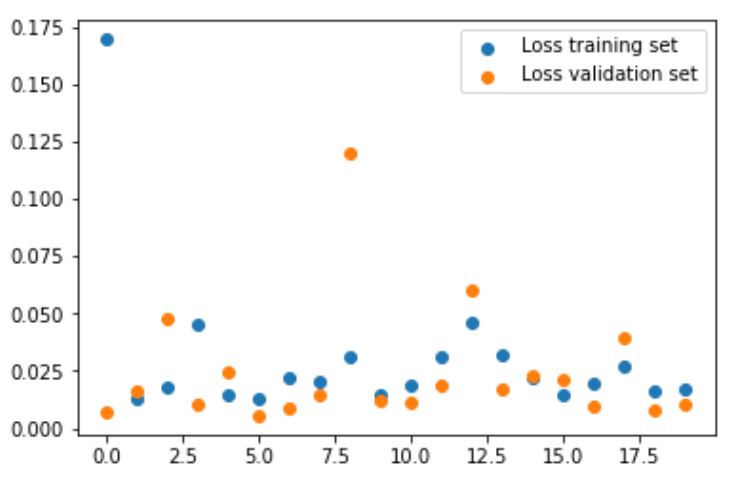

-> The network cannot learn anything: the learning rate is too high and the minimum is missed at each gradient descent step.

Low learning rate (1e-6)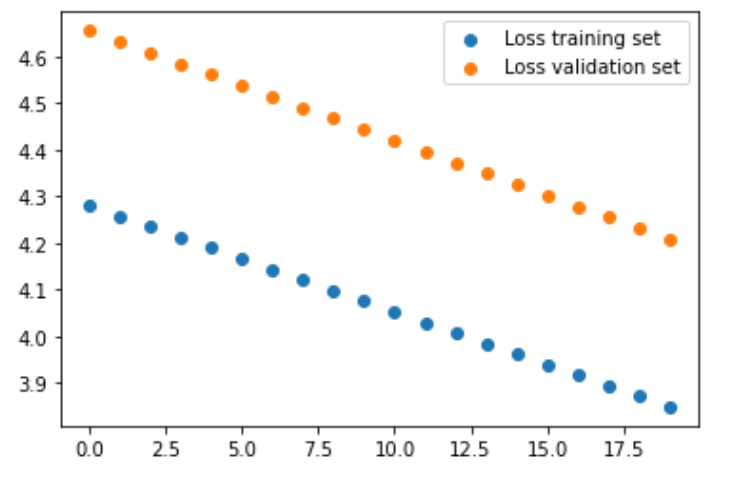

-> The network is learning but very slowly. It has not finished converging after 20 epochs!

## To go further with regularization...

Reminder: here are the most common ways to prevent overfitting in neural networks:

- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.
- Data augmentation
- Batch normalization (tf.keras.layers.BatchNormalization)

Remember that each method can help on its own, but often combining them can be even more effective.
Info here: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

### Add weight regularization

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

In [ ]:
from tensorflow.keras import regularizers

tf.keras.layers.Dense(10, activation='linear',
                      kernel_regularizer=regularizers.l2(0.001),
                      input_shape=(1,)),

### Add dropout

In Keras, you can introduce dropout in a network via the tf.keras.layers.Dropout layer, which gets applied to the output of layer right before. Usually, the dropout parameter is bewteen 0.2 and 0.5: it means that we shut down between 20% and 50% of the neurons for each feedforward pass of the training.

In [ ]:
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(1,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='linear', input_shape=(1,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

## Can you now try with multi-output regression?

Some tasks require predicting more than one numeric value. These tasks are referred to as multiple-output regression.

In multi-output regression, two or more outputs are required for each input sample, and the outputs are required simultaneously. The assumption is that the outputs are a function of the inputs.

Let's create some fake dataset for the occasion:

In [ ]:
# example of a multi-output regression problem
from sklearn.datasets import make_regression
# create dataset
X, y = make_regression(n_samples=1000,
                       n_features=10,
                       n_informative=1,  # number of informative features, i.e., the number of features used to build the linear model used to generate the output.
                       n_targets=3,
                       random_state=2  # for reproducibility
                       )


# summarize shape
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # random_state set for reproducibility
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)  # random_state set for reproducibility

# The Sequential model is a linear stack of layers and is very common.
model = Sequential()
# The first hidden layer is a set of 1 node (artificial neuron).
# Each node will receive an element from each input vector and apply some weight and bias to it:
# y = a(wx+b) where a = linear activatssion, ie identity.
model.add(Dense(units=3,
                input_shape=(10,),
                activation= "linear",
                kernel_regularizer=tf.keras.regularizers.l1(0.001)))

In [ ]:
optimizer = Adam(learning_rate=1e-2)  # 💡 You can change the optimizer to see the impact on the training speed!
model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=optimizer)  # https://keras.io/api/losses/

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
n_epochs = 100
batch_size = 10

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=n_epochs)

In [ ]:
plt.plot(range(n_epochs), history.history["loss"], marker=".", label='Loss training set')
plt.plot(range(n_epochs), history.history["val_loss"], marker=".", label='Loss validation set')
plt.legend()
plt.show()

prediction = model.predict(X_test)

plt.figure(figsize=(10, 15))
for i in range(10):
  plt.subplot(6, 2, i+1)
  plt.title(f"Feature {i}")
  plt.scatter(X_test[:,i], y_test[:,1], marker="o", label='Ground truth')
  plt.scatter(X_test[:,i], prediction[:,1], marker="x", label='Prediction')
  plt.legend()
plt.subplots_adjust(hspace=.4)

In [ ]:
weights_and_bias = model.layers[0].get_weights()
weights, bias = weights_and_bias

for i in range(3):
  plt.title(f"Neuron #{i+1}")
  plt.plot(weights[:,i], marker=".")
  plt.xlabel("Input feature")
  plt.ylabel("Weight")
  plt.show()

### Comments & solutions

You can see that simple is better: we only used 1 linear layer with L1 regularization. The L1-norm is indeed known to be good to set some weights to zero, which is exactly what we wanted to do!

Always think about doing simple stuff. Adding more layers or more neurons is not always the best solution!

#4. Pytorch

PyTorch is an open source machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing, originally developed by Meta AI and now part of the Linux Foundation umbrella.

In [ ]:
import torch

from matplotlib import pyplot as plt
%matplotlib inline

## 1. Tensors

In [ ]:
# Random
x = torch.rand(2, 4)
print(x)

In [ ]:
# With values
y = torch.tensor([[0, 1, 2.5, 4.4], [3.1, 4, 5.7, 10.6]])
print(y)

In [ ]:
# Resizing
x = x.view(2, 2, 2)
print(x)

In [ ]:
# Get the size or the shape as in numpy
print(x.size())
print(x.shape)

In [ ]:
# Convert to numpy
a = x.numpy()
print(type(a))
b = torch.from_numpy(a)
print(type(b))

## 2. Autograd: automatic differentiation


In [ ]:
# Define a tensor
x = torch.ones(2, 2, requires_grad=True)
print(x)

In [ ]:
y = x + 2
print(y)
print(y.grad_fn)  # Records the operations done to a tensor that 'requires grad'

In [ ]:
out = y.mean()  # scalar
print(out)

In [ ]:
# Backpropagation
out.backward()

# Gradient computed on input
print(x.grad)

## 3. Simple one layer network


D_in is the input dimension, H the hidden dimension and D_out the output dimension

In [ ]:
D_in, H, D_out = 1000, 100, 10
BATCH_SIZE = 64

In [ ]:
# Create random Tensors to hold inputs and outputs
x = torch.randn(BATCH_SIZE, D_in)
y = torch.randn(BATCH_SIZE, D_out)

Use the nn package from PyTorch to create the model and the loss function. This package contain lot of cell implementation (linear, CNN, LSTM, GRU, RNN, ...).

nn.Sequential to create a sequence of layers.

The nn package also contains definitions of popular loss functions; the loss can also be implemented manually.

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),  # Linear layer
    torch.nn.ReLU(),  # Activation function: ReLU
    torch.nn.Linear(H, D_out),
)

# We will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss()

Use the optim package (torch.optim) to define an Optimizer that will update the weights of the model for us. Here we will use Adam; the optim package contains many other optimization algoriths. The first argument to the Adam constructor tells the optimizer which Tensors it should update.

In [ ]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
NB_EPOCHS = 500
loss_evolution = []

for epoch in range(NB_EPOCHS):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    loss_evolution.append(loss.item())

    # Before the backward pass, zero all of the gradients for the variables
    # it will update (which are the learnable weights of the model).
    # This is because by default, gradients are accumulated in buffers (i.e, not overwritten)
    # Whenever .backward() is called.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

In [ ]:
loss.detach().numpy()

In [ ]:
plt.plot(loss_evolution)
plt.title("Loss evolution during training")
plt.show()

#5. GPUs vs CPUs

First, you'll need to enable GPUs for the notebook:
- Navigate to Edit→Notebook Settings (or Modifier -> Paramètres du Notebook in French)
- select GPU from the Hardware Accelerator drop-down (or Accélérateur matériel in French)

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

Nothing to do, just run the code to see the difference of computation time.

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))